In [1]:
#import + consolidate San Diego RIPA data into one massive df (result_df)

In [2]:
import pandas as pd   
import missingno as msno
import matplotlib.pyplot as plt
def convert_dtype_float(x):
    if not x:
        return 0
    try:
        return float(x)   
    except:        
        return 0
    
def convert_dtype_string(x):
    if not x:
        return ''
    try:
        return str(x)   
    except:        
        return ''

contraband_evid_df = pd.read_csv("ripa_contraband_evid_datasd.csv")                                
disability_df = pd.read_csv("ripa_disability_datasd.csv")
gender_df = pd.read_csv("ripa_gender_datasd.csv")
prop_seize_basis_df = pd.read_csv("ripa_prop_seize_basis_datasd.csv")
prop_seize_type_df = pd.read_csv("ripa_prop_seize_type_datasd.csv")
race_df = pd.read_csv("ripa_race_datasd.csv")
stop_result_df = pd.read_csv("ripa_stop_result_datasd.csv")
stop_reason_df = pd.read_csv("ripa_stop_reason_datasd.csv", converters = {"reason_for_stopcode": convert_dtype_float})
stop_details_df = pd.read_csv("ripa_stops_datasd.csv", converters = {"land_mark": convert_dtype_string}) 

result_df = pd.merge(contraband_evid_df, disability_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, gender_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, prop_seize_basis_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, prop_seize_type_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, race_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_result_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_reason_df, how="outer", on=["stop_id","pid"])
result_df = pd.merge(result_df, stop_details_df, how="outer", on=["stop_id","pid"])

result_df['datetime_stop'] = pd.to_datetime(result_df['date_stop'] + ' ' + result_df['time_stop'])
result_df.drop(['date_stop', 'time_stop'], axis=1, inplace=True)

In [3]:
result_df

,stop_id,pid,contraband,disability,gender,basisforpropertyseizure,type_of_property_seized,race,resultkey,result,...,beat_name,isstudent,perceived_limited_english,perceived_age,perceived_gender,gender_nonconforming,gend,gend_nc,perceived_lgbt,datetime_stop
0,2443.0,1.0,None,None,Male,NaN,NaN,White,6.0,Custodial Arrest without warrant,...,Pacific Beach 122,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 00:01:37
1,2444.0,1.0,None,None,Male,NaN,NaN,White,2.0,Warning (verbal or written),...,Mission Beach 121,0.0,0.0,25.0,Male,0.0,1.0,NaN,No,2018-07-01 00:03:34
2,2447.0,1.0,None,None,Male,NaN,NaN,Hispanic/Latino/a,1.0,No Action,...,El Cerrito 822,0.0,0.0,30.0,Male,0.0,1.0,NaN,No,2018-07-01 00:05:43
3,2447.0,2.0,None,None,Female,NaN,NaN,Hispanic/Latino/a,1.0,No Action,...,El Cerrito 822,0.0,0.0,30.0,Female,0.0,2.0,NaN,No,2018-07-01 00:05:43
4,2448.0,1.0,None,None,Male,NaN,NaN,White,1.0,No Action,...,Ocean Beach 614,0.0,0.0,23.0,Male,0.0,1.0,NaN,No,2018-07-01 00:19:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707935,478845.0,1.0,None,None,Male,NaN,NaN,White,10.0,Psychiatric hold,...,Kearney Mesa 313,0.0,0.0,18.0,Male,0.0,1.0,NaN,No,2021-09-30 21:00:00
707936,478867.0,1.0,None,None,Male,NaN,NaN,White,7.0,Field interview card completed,...,Midway District 611,0.0,0.0,30.0,Male,0.0,1.0,NaN,No,2021-09-30 15:50:00
707937,478867.0,2.0,None,None,Female,NaN,NaN,White,7.0,Field interview card completed,...,Midway District 611,0.0,0.0,30.0,Female,0.0,2.0,NaN,No,2021-09-30 15:50:00
707938,478934.0,1.0,Alcohol,None,Male,NaN,NaN,Black/African American,6.0,Custodial Arrest without warrant,...,Clairemont Mesa East 111,0.0,0.0,20.0,Male,0.0,1.0,NaN,No,2021-09-30 22:30:00


In [4]:
#missingno package allows for visualization of missing data within result_df

<AxesSubplot:>

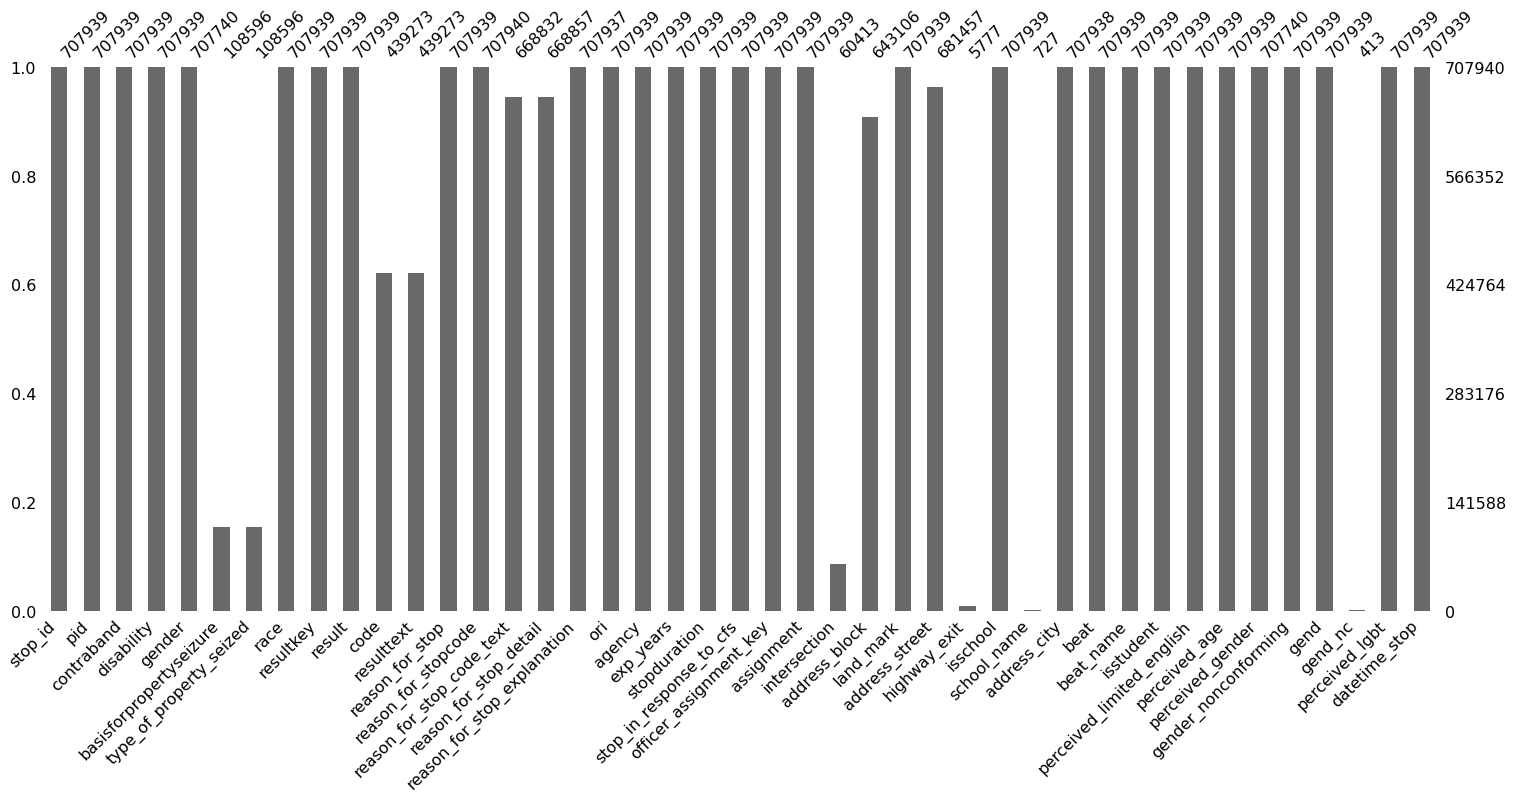

In [5]:
msno.bar(result_df)

In [6]:
#group all the stop data by race to calculate + visualize overall racial proportions

In [7]:
stops_racial_breakdown_df = result_df.groupby('race', as_index=False).size()
stops_racial_breakdown_df['proportion'] = stops_racial_breakdown_df['size']/stops_racial_breakdown_df['size'].sum()

In [8]:
stops_racial_breakdown_df

,race,size,proportion
0,Asian,32611,0.046065
1,Black/African American,144207,0.203700
2,Hispanic/Latino/a,204932,0.289477
3,Middle Eastern or South Asian,18043,0.025487
4,Native American,1819,0.002569
5,Pacific Islander,6989,0.009872
6,White,299338,0.422830


In [ ]:
#census data has middle eastern as part of the white category
#census data lists south asian as part of the asian category
#have not found a specific/accurate number of middle eastern OR 
#south asian individuals in SD
#making it difficult to figure out how exactly to make the split
#without sacrificing accuracy

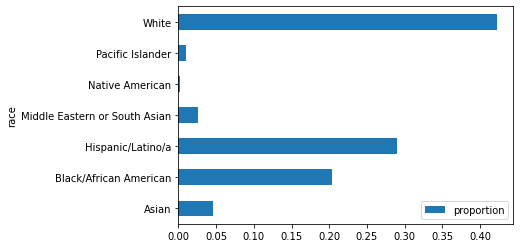

In [9]:
stops_racial_breakdown_df.plot.barh(x="race", y=["proportion"])
plt.show()

In [10]:
#group stop data by the reason for the stop to calculate + visualize proportions (each reason vs stops overall)

In [11]:
stop_by_reason_df = result_df.groupby(['reason_for_stop'], as_index=False).size()
stop_by_reason_df['proportion'] = stop_by_reason_df['size']/stop_by_reason_df['size'].sum()

In [12]:
stop_by_reason_df 

,reason_for_stop,size,proportion
0,Consensual Encounter resulting in a search,8803,0.012435
1,Determine whether the student violated school ...,70,0.000099
2,Investigation to determine whether the person ...,8483,0.011983
3,Knowledge of outstanding arrest warrant/wanted...,9984,0.014103
4,Known to be on Parole / Probation / PRCS / Man...,11742,0.016586
5,Possible conduct warranting discipline under E...,24,0.000034
6,Reasonable Suspicion,381678,0.539140
7,Traffic Violation,287155,0.405621


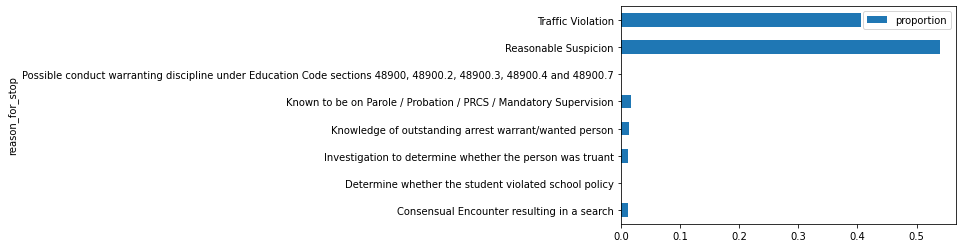

In [30]:
stop_by_reason_df.plot.barh(x="reason_for_stop", y=["proportion"])
plt.show()

In [14]:
#calculate the racial breakdown (amount & proportion) per each reason for the stop 

In [15]:
reason_racial_breakdown_df = result_df.groupby(['reason_for_stop', 'race'], as_index=False).size()

In [16]:
c_ent = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Consensual Encounter resulting in a search' , 'size'].sum()
student = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Determine whether the student violated school policy' , 'size'].sum()
truant = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Investigation to determine whether the person was truant' , 'size'].sum()
warrant = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Knowledge of outstanding arrest warrant/wanted person' , 'size'].sum()
parole = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Known to be on Parole / Probation / PRCS / Mandatory Supervision' , 'size'].sum()
conduct = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7' , 'size'].sum()
suspicion = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Reasonable Suspicion' , 'size'].sum()
traffic = reason_racial_breakdown_df.loc[reason_racial_breakdown_df['reason_for_stop'] == 
                                       'Traffic Violation' , 'size'].sum()
    

In [17]:
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Consensual Encounter resulting in a search", "total per reason"] = c_ent
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Determine whether the student violated school policy", "total per reason"] = student
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Investigation to determine whether the person was truant", "total per reason"] = truant
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Knowledge of outstanding arrest warrant/wanted person", "total per reason"] = warrant
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Known to be on Parole / Probation / PRCS / Mandatory Supervision", "total per reason"] = parole
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7", "total per reason"] = conduct
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Reasonable Suspicion", "total per reason"] = suspicion
reason_racial_breakdown_df.loc[reason_racial_breakdown_df.reason_for_stop == 
                              "Traffic Violation", "total per reason"] = traffic

In [18]:
reason_racial_breakdown_df['racial proportion per reason'] = reason_racial_breakdown_df['size']/reason_racial_breakdown_df['total per reason']

In [19]:
reason_racial_breakdown_df

,reason_for_stop,race,size,total per reason,racial proportion per reason
0,Consensual Encounter resulting in a search,Asian,333,8803.0,0.037828
1,Consensual Encounter resulting in a search,Black/African American,1750,8803.0,0.198796
2,Consensual Encounter resulting in a search,Hispanic/Latino/a,2756,8803.0,0.313075
3,Consensual Encounter resulting in a search,Middle Eastern or South Asian,128,8803.0,0.014540
4,Consensual Encounter resulting in a search,Native American,45,8803.0,0.005112
5,Consensual Encounter resulting in a search,Pacific Islander,95,8803.0,0.010792
6,Consensual Encounter resulting in a search,White,3696,8803.0,0.419857
7,Determine whether the student violated school ...,Asian,1,70.0,0.014286
8,Determine whether the student violated school ...,Black/African American,5,70.0,0.071429
9,Determine whether the student violated school ...,Hispanic/Latino/a,47,70.0,0.671429


In [20]:
#pivot the racial breadown by reason data so that it's easier to visualize 
#visualize in stacked bar chart form

In [21]:
pivoted_df = reason_racial_breakdown_df.pivot(index='reason_for_stop', columns='race', values='size')
pivoted_df

race,Asian,Black/African American,Hispanic/Latino/a,Middle Eastern or South Asian,Native American,Pacific Islander,White
reason_for_stop,,,,,,,
Consensual Encounter resulting in a search,333.0,1750.0,2756.0,128.0,45.0,95.0,3696.0
Determine whether the student violated school policy,1.0,5.0,47.0,2.0,NaN,NaN,15.0
Investigation to determine whether the person was truant,381.0,1991.0,2211.0,147.0,28.0,86.0,3639.0
Knowledge of outstanding arrest warrant/wanted person,328.0,2553.0,2744.0,180.0,77.0,131.0,3971.0
Known to be on Parole / Probation / PRCS / Mandatory Supervision,308.0,3174.0,3721.0,123.0,44.0,147.0,4225.0
"Possible conduct warranting discipline under Education Code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7",10.0,NaN,6.0,NaN,NaN,NaN,8.0
Reasonable Suspicion,11042.0,84421.0,96182.0,5869.0,1222.0,3246.0,179696.0
Traffic Violation,20208.0,50313.0,97265.0,11594.0,403.0,3284.0,104088.0


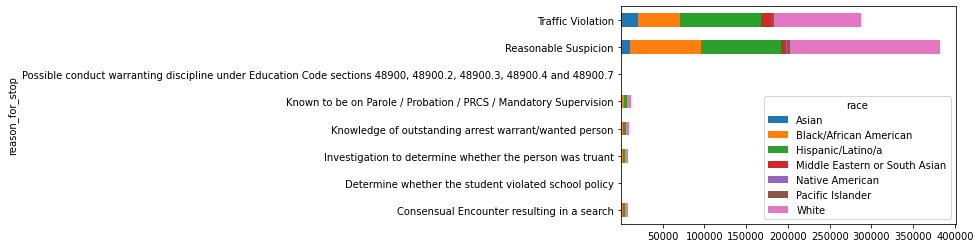

In [22]:
pivoted_df.plot.barh(stacked=True)
plt.show()

In [23]:
#group data by reason and then result + calculate racial breakdown for each reason/result combination

In [24]:
result_racial_breakdown_df = result_df.groupby(['reason_for_stop','result', 'race'], as_index=False).size()

In [25]:
result_racial_breakdown_df

,reason_for_stop,result,race,size
0,Consensual Encounter resulting in a search,Citation for infraction,Asian,7
1,Consensual Encounter resulting in a search,Citation for infraction,Black/African American,51
2,Consensual Encounter resulting in a search,Citation for infraction,Hispanic/Latino/a,105
3,Consensual Encounter resulting in a search,Citation for infraction,Middle Eastern or South Asian,8
4,Consensual Encounter resulting in a search,Citation for infraction,Native American,2
...,...,...,...,...
443,Traffic Violation,Warning (verbal or written),Hispanic/Latino/a,23564
444,Traffic Violation,Warning (verbal or written),Middle Eastern or South Asian,3158
445,Traffic Violation,Warning (verbal or written),Native American,121
446,Traffic Violation,Warning (verbal or written),Pacific Islander,787


In [26]:
#pivot the racial breadown by reason/result data so that it's easier to visualize 
#visualize in stacked bar chart form

In [31]:
pivoted_with_reason_result_df = result_racial_breakdown_df.pivot(index=["reason_for_stop", "result"], columns=["race"],values="size")
pivoted_with_reason_result_df = pivoted_with_reason_result_df.div(pivoted_with_reason_result_df.sum(axis=1), axis=0)

In [28]:
temp = pivoted_with_reason_result_df.loc[("Traffic Violation", slice(None))]
temp.div(temp.sum(axis=1), axis=0)

race,Asian,Black/African American,Hispanic/Latino/a,Middle Eastern or South Asian,Native American,Pacific Islander,White
result,,,,,,,
Citation for infraction,0.085716,0.108974,0.331239,0.053482,0.000987,0.009210,0.410393
Contacted U.S. Department of Homeland Security,NaN,0.062500,0.125000,NaN,NaN,0.375000,0.437500
Contacted parent/legal guardian or other person responsible for the minor,0.073529,0.421569,0.289216,0.024510,NaN,NaN,0.191176
Custodial Arrest pursuant to outstanding warrant,0.053922,0.215686,0.328627,0.004510,0.000588,0.021569,0.375098
Custodial Arrest without warrant,0.047300,0.259809,0.320069,0.012307,0.001077,0.023046,0.336391
Field interview card completed,0.044854,0.318658,0.391253,0.012774,0.001804,0.009605,0.221052
In-field cite and release,0.054377,0.158357,0.314433,0.043772,0.002113,0.009084,0.417864
No Action,0.059105,0.224413,0.389078,0.030556,0.001887,0.009315,0.285645
Noncriminal transport or caretaking transport,0.041237,0.164948,0.396907,0.036082,0.010309,0.010309,0.340206


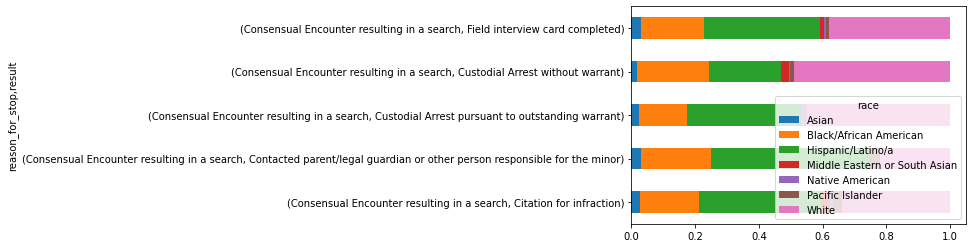

In [32]:
pivoted_with_reason_result_head_df = pivoted_with_reason_result_df.head(5)
pivoted_with_reason_result_head_df.plot.barh(stacked=True)
plt.show()